
# Table of contents
---

- [Libraries](#Libraries)
- [Ask](#Ask)
- [Prepare](#Prepare)
- [Process](#Process)
- [Analyze](#Analyze)
- [Share](#Share)
- [Act](#Act)
---

# Libraries 
The libraries that might be used.

In [1]:
# Python libraries 
import numpy as np
import pandas as pd
import sympy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

In [2]:
# R libraries
#library(bnlearn)

In [3]:
import warnings
warnings.filterwarnings("ignore")

***
# Ask

### Business Task

Analyze how `annual members` and `casual riders` use Cyclistic bikes differently. The insights gained from this analysis will support the design of marketing strategies aimed at converting casual riders into annual members.

### Key Stakeholders

- Lily Moreno (Director of Marketing)  
- Cyclistic marketing analytics team  
- Cyclistic executive team

***
# Prepare

**Data location and access:**  
The data was downloaded from the [Divvy System Data Portal](https://divvy-tripdata.s3.amazonaws.com/index.html), which is publicly available and maintained by Motivate International Inc.

**Time range:**  
The dataset includes Cyclistic bike trip data from **July 2024 to June 2025**, representing the most recent 12-month period available. (The datasets have a different name because `Cyclistic` is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable me to answer the business questions).

**Data format and organization:**  
Each month’s data is stored in a separate CSV file. All files share a consistent schema, including trip start time, end time, duration, station locations, user type (`member` or `casual`), and more.

**Privacy and licensing:**  
The data is public and anonymized. No personally identifiable information (PII) is included, complying with privacy and data use policies.

**Credibility and verification:**  
The data has been made available by `Motivate International Inc.` under this [license](https://divvybikes.com/data-license-agreement). 



***
# Process

*** 

## Initial processing in the CSV files

In this step, I processed the data files using Excel, as only simple handling was required. 

I downloaded ZIP files named in the format `202407-divvy-tripdata.zip`,...,`202506-divvy-tripdata.zip` from the website [Divvy System Data Portal](https://divvy-tripdata.s3.amazonaws.com/index.html).

After extracting them, I obtained 12 CSV files containing data from July 2024 to June 2025.



For each CSV file, I performed the following steps directly using built-in Excel functions and tools.


### Add new columns

0. Create new column: `ride_length = started_at - ended_at`, and format this column as `HH:MM:SS`. Copy the entire columns worksheet and paste as values only.

1. `day_of_week = TEXT(started_at,"dddd")`. Copy the entire columns worksheet and paste as values only.

2. Changed the format (using Format Cells) of the two columns `started_at` and `ended_at` to the `dd/mm/yyyy hh:mm:ss` format.

3. Split the `started_at column` (e.g., `11/07/2024 08:15:15`) into `started_date` (`11/07/2024`) and `start_time` (`08:15:15`) using the `Text to Columns` feature. Format `started_date` as `dd/mm/yyyy` and `start_time` as `HH:MM:SS`.

4. Similarly, split the `ended_at` column into `ended_date` and `end_time`. Format `ended_date` as `dd/mm/yyyy` and `end_time` as `HH:MM:SS`.

5. Delete two the original columns `started_at` column and `ended_at` column.


### Check for other possible issues

I used the filter function in Excel to check for any spelling errors or extra spaces in some character-type columns. Fortunately, no such issues were found. However, several columns contain a large number of missing values, which I will carefully review and handle in the next steps.

### Save
Save each file as a CSV format in the folder `previous_12_months_of_Cyclistic_trip`. 

The new 12 CSV files are contained in the folder `previous_12_months_of_Cyclistic_trip` and ready for next processing steps.


## Load the datasets and merge them into a DataFrame

In this step, I use Python for convenience in processing. Thanks to the previous step where the date column was added, I can now import all 12 datasets and combine them into a single DataFrame without losing any information about the date.

In [4]:
folder_path = "../2_google-data-analytics-capstone-project/previous_12_months_of_Cyclistic_trip"

file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

df_list = []
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

The DataFrame after combining the 12 datasets is named `combined_df`.

In [5]:
combined_df.iloc[:,:].head(5)

,ride_id,rideable_type,started_date,start_time,day_of_week,ended_date,end_time,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2658E319B13141F9,electric_bike,11/07/2024,08:15:15,Thursday,11/07/2024,08:17:56,00:02:42,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,casual
1,B2176315168A47CE,electric_bike,11/07/2024,15:45:08,Thursday,11/07/2024,16:06:04,00:20:56,NaN,NaN,NaN,NaN,41.79,-87.60,41.80,-87.59,casual
2,C2A9D33DF7EBB422,electric_bike,11/07/2024,08:24:48,Thursday,11/07/2024,08:28:05,00:03:17,NaN,NaN,NaN,NaN,41.79,-87.59,41.79,-87.60,casual
3,8BFEA406DF01D8AD,electric_bike,11/07/2024,08:46:07,Thursday,11/07/2024,09:14:12,00:28:05,NaN,NaN,NaN,NaN,41.88,-87.64,41.90,-87.67,casual
4,ECD3EF02E5EB73B6,electric_bike,11/07/2024,18:18:17,Thursday,11/07/2024,18:30:20,00:12:04,NaN,NaN,NaN,NaN,41.95,-87.64,41.91,-87.62,casual


Let's first see the data overview

In [6]:
combined_df.info()
print(len(combined_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597030 entries, 0 to 5597029
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_date        object 
 3   start_time          object 
 4   day_of_week         object 
 5   ended_date          object 
 6   end_time            object 
 7   ride_length         object 
 8   start_station_name  object 
 9   start_station_id    object 
 10  end_station_name    object 
 11  end_station_id      object 
 12  start_lat           float64
 13  start_lng           float64
 14  end_lat             float64
 15  end_lng             float64
 16  member_casual       object 
dtypes: float64(4), object(13)
memory usage: 725.9+ MB
5597030


## Missing values and blank check

In [7]:
print("Missing value rate for each column: ")
print((combined_df.isnull().sum()/(combined_df.shape[0]))*100,"\n")
print("Blank value count for each column: ")
print((combined_df == " ").sum())

Missing value rate for each column: 
ride_id                0.000000
rideable_type          0.000000
started_date           0.000000
start_time             0.000000
day_of_week            0.000000
ended_date             0.000000
end_time               0.000000
ride_length            0.000000
start_station_name    19.453603
start_station_id      19.453603
end_station_name      20.001411
end_station_id        20.001411
start_lat              0.000000
start_lng              0.000000
end_lat                0.107736
end_lng                0.107736
member_casual          0.000000
dtype: float64 

Blank value count for each column: 
ride_id               0
rideable_type         0
started_date          0
start_time            0
day_of_week           0
ended_date            0
end_time              0
ride_length           0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_ln

Up to 19% of values are NULL in the column `start_station_name`, and 20% in the column `end_station_name`. 

The two columns `end_lat` and `end_lng` share the same NULL rate (0.107736%). 

The `start_station_id` is fixed for each `start_station_name`, so it's sufficient to keep only one of the two columns. The same applies to `end_station_name` and `end_station_id`.

It's clear that station names are much more useful than IDs, which are just numbers. Therefore, I will remove the two ID columns, and thus there is no need to worry about the NULL values in these ID columns anymore.

In [8]:
combined_df.drop(columns=['start_station_id', 'end_station_id'], inplace=True)

In [9]:
print("Missing value rate for each column: ")
print((combined_df.isnull().sum()/(combined_df.shape[0]))*100,"\n")

Missing value rate for each column: 
ride_id                0.000000
rideable_type          0.000000
started_date           0.000000
start_time             0.000000
day_of_week            0.000000
ended_date             0.000000
end_time               0.000000
ride_length            0.000000
start_station_name    19.453603
end_station_name      20.001411
start_lat              0.000000
start_lng              0.000000
end_lat                0.107736
end_lng                0.107736
member_casual          0.000000
dtype: float64 



Let's see if removing the NULLs from the column `end_lat` helps eliminate the NULLs in the column `end_lng`.


In [10]:
print("Missing value proportion for each column, after removing NULLs from end_lat: ")
df_eng_lng_nadrop=combined_df.dropna(subset=['end_lat'])
print((df_eng_lng_nadrop.isnull().sum())/(df_eng_lng_nadrop.shape[0])*100,"\n")
print("number of lost rows: ",len(combined_df)-len(df_eng_lng_nadrop))

Missing value proportion for each column, after removing NULLs from end_lat: 
ride_id                0.000000
rideable_type          0.000000
started_date           0.000000
start_time             0.000000
day_of_week            0.000000
ended_date             0.000000
end_time               0.000000
ride_length            0.000000
start_station_name    19.474584
end_station_name      19.915131
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
member_casual          0.000000
dtype: float64 

number of lost rows:  6030


$\Rightarrow$ It does help!

NULL rows of the two columns `end_lat` and `end_lng` are completely the same !

Let's check the if `end_station_name` share the same NULL rows with `end_lat` and `end_lng`

In [11]:
df=combined_df
df_null_end_coords = df[df['end_lat'].isnull() & df['end_lng'].isnull()][['end_lat', 'end_lng', 'end_station_name']]
print("The dataframe df_null_end_coords cointains 3 columns:\nend_lat, end_lng (just NULL rows);\nend_station_name\n")
print("The dataframe df_null_end_coords has:", len(df_null_end_coords), "rows")
print("with the number of NULL rows of end_station_name are:",df_null_end_coords["end_station_name"].isnull().sum())

The dataframe df_null_end_coords cointains 3 columns:
end_lat, end_lng (just NULL rows);
end_station_name

The dataframe df_null_end_coords has: 6030 rows
with the number of NULL rows of end_station_name are: 6030


$\Rightarrow $ Whenever the destination coordinates (`end_lat` and `end_lng`) are missing, the `end_station_name` is also missing. Therefore, there is no reliable way to determine or recover the destination location for these rows without applying more complex methods.

I decided to remove the rows with missing values in the `end_lat` column. Since these 6,030 rows (which also lack `end_lng`) account for only `0.107736%` of the entire dataset of `5,597,030` records, this is a simple solution that avoids unnecessary complexity while minimizing data loss.

In [12]:
combined_df=combined_df.dropna(subset=['end_lat'])

In [13]:
print(len(combined_df),"rows remaining, after removing 6030 rows")

5591000 rows remaining, after removing 6030 rows


In [14]:
print("Missing value for each column, after removing NULLs from end_lat: \n")
print(((combined_df.isnull().sum())/(len(combined_df)))*100,"\n")

Missing value for each column, after removing NULLs from end_lat: 

ride_id                0.000000
rideable_type          0.000000
started_date           0.000000
start_time             0.000000
day_of_week            0.000000
ended_date             0.000000
end_time               0.000000
ride_length            0.000000
start_station_name    19.474584
end_station_name      19.915131
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
member_casual          0.000000
dtype: float64 



The remaining task is to handle the NULL values in `start_station_name` and `end_station_name`. Despite the missing station names, all these records still have valid coordinates (latitude and longitude) for both the start and end locations.


Let's see what the coordinates of the start and end stations look like (without NULLs).

In [15]:
print("start stations with coordinates:")
start_stations = combined_df[['start_station_name', 'start_lat', 'start_lng']].dropna()
print(start_stations.iloc[205:210,:],"\n") 

print("end stations with coordinates")
end_stations = combined_df[['end_station_name', 'end_lat', 'end_lng']].dropna()
print(end_stations.iloc[:10,:])  

start stations with coordinates:
                 start_station_name  start_lat  start_lng
13784   Cottage Grove Ave & 51st St  41.803038 -87.606615
13789   Cottage Grove Ave & 51st St  41.803038 -87.606615
13851  California Ave & Division St  41.902999 -87.697605
13933   Cottage Grove Ave & 51st St  41.803038 -87.606615
14021  California Ave & Division St  41.903029 -87.697474 

end stations with coordinates
                             end_station_name    end_lat    end_lng
8              California Ave & Milwaukee Ave  41.922695 -87.697153
93     Public Rack - Nashotah & Northwest Hwy  41.988141 -87.791447
243            California Ave & Milwaukee Ave  41.922695 -87.697153
260            California Ave & Milwaukee Ave  41.922695 -87.697153
295                      Kedzie Ave & Lake St  41.884603 -87.706304
384  Public Rack - Chase Ave & Touhy Ave - NW  42.014271 -87.690408
404            California Ave & Milwaukee Ave  41.922695 -87.697153
431            California Ave & Milwaukee A

**It is noticeable that some stations have different coordinates**.  Let's filter out station names that are not NULL and examine some of their coordinates.

In [16]:
start_stations = combined_df[['start_station_name', 'start_lat', 'start_lng']].dropna()
start_stations = start_stations.rename(columns={
    'start_station_name': 'station_name',
    'start_lat': 'lat',
    'start_lng': 'lng'
})

end_stations = combined_df[['end_station_name', 'end_lat', 'end_lng']].dropna()
end_stations = end_stations.rename(columns={
    'end_station_name': 'station_name',
    'end_lat': 'lat',
    'end_lng': 'lng'
})

all_stations = pd.concat([start_stations, end_stations], ignore_index=True)

all_stations = all_stations.drop_duplicates()

duplicated_coords = (
    all_stations
    .groupby('station_name')
    .filter(lambda x: x[['lat', 'lng']].nunique().shape[0] > 1)
    .sort_values('station_name')
)
print("some stations have different coordinates:")
print(duplicated_coords.iloc[1:5,:])
print(duplicated_coords.iloc[300:305,:])


some stations have different coordinates:
                station_name        lat        lng
468335   2112 W Peterson Ave  41.991154 -87.683546
226873   2112 W Peterson Ave  41.991153 -87.683584
210661   2112 W Peterson Ave  41.991241 -87.683643
3701323  2112 W Peterson Ave  41.991148 -87.683632
              station_name        lat        lng
366969   900 W Harrison St  41.874755 -87.649808
2745330  900 W Harrison St  41.874715 -87.649863
1095200  900 W Harrison St  41.874686 -87.649845
1286922  900 W Harrison St  41.879660 -87.631383
1286946  900 W Harrison St  41.874775 -87.649751


The coordinates of a station are not absolute and may vary slightly. This is reasonable, as location-tracking devices are rarely perfectly accurate. This could be the reason why there are so many rows with missing start or end station names!

Let’s examine how much the coordinates can differ for stations with multiple associated locations. 

Here are the top 3 stations with the largest variation in longitude and latitude among their recorded coordinates.

In [17]:

variation = (all_stations.groupby('station_name').
             agg({'lat': ['min', 'max'],'lng': ['min', 'max']})
            )


variation['lat_diff'] = variation[('lat', 'max')] - variation[('lat', 'min')]
variation['lng_diff'] = variation[('lng', 'max')] - variation[('lng', 'min')]

print(variation[['lat_diff', 'lng_diff']].sort_values(by='lat_diff', ascending=False).head(5))


                            lat_diff  lng_diff
                                              
station_name                                  
Clark St & Schiller St      0.204104  0.102085
Streeter Dr & Grand Ave     0.192344  0.156235
Wells St & Concord Ln       0.188817  0.134270
Clarendon Ave & Junior Ter  0.159064  0.070867
Wabash Ave & Roosevelt Rd   0.158601  0.208272


Consider the top station: `Clark St & Schiller St`. The maximum and minimum values for both latitude and longitude are:

In [18]:
print("max_lat=",all_stations[all_stations["station_name"]=="Clark St & Schiller St"]["lat"].max())
print("min_lat=",all_stations[all_stations["station_name"]=="Clark St & Schiller St"]["lat"].min())
print("max_lng=",all_stations[all_stations["station_name"]=="Clark St & Schiller St"]["lng"].max())
print("min_lng=",all_stations[all_stations["station_name"]=="Clark St & Schiller St"]["lng"].min())

max_lat= 42.01157333
min_lat= 41.8074698
max_lng= -87.58876717
min_lng= -87.69085203


Then comes the result as from above codes:
$$
\boxed{\text{lat\_diff} = \text{max\_lat} - \text{min\_lat} = 0.204104}
$$
$$
\boxed{\text{lng\_diff} = \text{max\_lng} - \text{min\_lng} = 0.102085}
$$

Notice that `max_lat = 42.01157333` and `min_lat = 41.8074698`. The difference appears not only in the decimal places but even in the whole number part of the coordinates.

The discrepancy in the recorded coordinates of the station `Clark St & Schiller St` is clearly illustrated in the figure below, where the green circle represents a 30-meter radius around the center point (the average of all coordinates).

In [56]:
import folium

station_name = "Aberdeen St & Jackson Blvd"
coords = all_stations.query("station_name == @station_name")[['lat', 'lng']].drop_duplicates()

m = folium.Map(location=coords.mean().values.tolist(), zoom_start=18)

for lat, lng in coords.values: folium.Marker([lat, lng]).add_to(m)

folium.Circle(location=coords.mean().values.tolist(), 
              radius=30, color='green', fill=False).add_to(m)

#m

![munich_district.jpg](output8.png)

Seems very bad!

The coordinates could help recover missing station names if there were at least one row with the same coordinates and a valid station name. But in this dataset, many stations are linked to multiple, often very different, coordinates, which makes recovery nearly impossible.

## Decide not to handle missing value

Missing values in the start_station_name and end_station_name columns haven’t been addressed yet. I’m keeping the data as is for now and will temporarily exclude rows with missing values when analyzing these columns to ensure accuracy.

In [20]:
print(tuple(combined_df.columns))

('ride_id', 'rideable_type', 'started_date', 'start_time', 'day_of_week', 'ended_date', 'end_time', 'ride_length', 'start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual')


Create new column: `ride_length_minutes`

In [21]:
combined_df['ride_length'] = pd.to_timedelta(combined_df['ride_length'])
combined_df['ride_length_minutes'] = combined_df['ride_length'].dt.total_seconds() / 60
combined_df["ride_length_minutes"]
#(float(u[:2])*60) + float(u[3:5]) + round(float(u[6:])/60,2)

0           2.700000
1          20.933333
2           3.283333
3          28.083333
4          12.066667
             ...    
5597025     0.466667
5597026     5.400000
5597027    54.366667
5597028     4.666667
5597029     3.983333
Name: ride_length_minutes, Length: 5591000, dtype: float64

## Check for Outliers

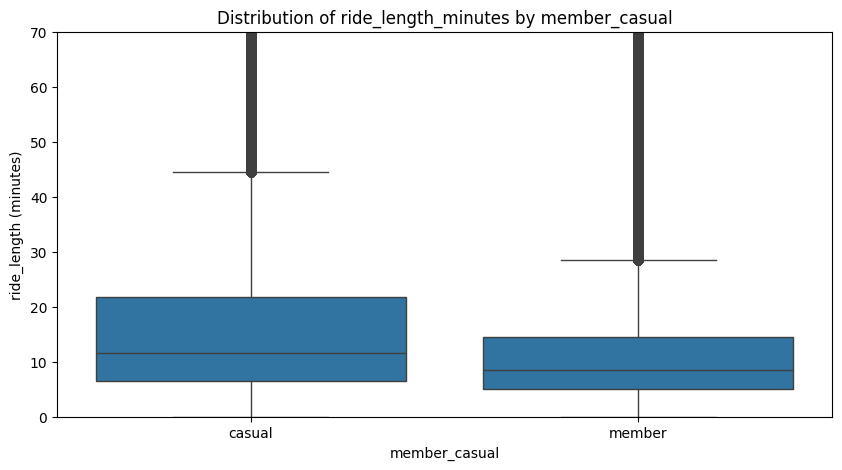

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_df, x="member_casual", y="ride_length_minutes")
plt.title("Distribution of ride_length_minutes by member_casual")
plt.xlabel("member_casual")
plt.ylabel("ride_length (minutes)")
plt.ylim(0, 70) 
plt.show()


Too many outliers

In [23]:
def detect_outliers_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Calculate thresholds for each group
for group_name in combined_df["member_casual"].unique():
    subset = combined_df[combined_df["member_casual"] == group_name]["ride_length_minutes"]
    low, high = detect_outliers_iqr(subset)
    outliers = subset[(subset < low) | (subset > high)]
    print(f"--- {group_name} ---")
    print(f"IQR threshold: below {round(low,2)} minutes or above {round(high,2)} minutes")
    print(f"Number of outliers: {len(outliers)} out of {len(subset)} total ({round(len(outliers)/len(subset)*100, 2)}%)\n")


--- casual ---
IQR threshold: below 0 minutes or above 44.53 minutes
Number of outliers: 175998 out of 2050055 total (8.59%)

--- member ---
IQR threshold: below 0 minutes or above 28.54 minutes
Number of outliers: 213932 out of 3540945 total (6.04%)



Because outliers account for less than 10% and the dataset contains over 5 million rows, I decided to remove them.

In [24]:
# IQR thresholds for each group
casual_upper = 50.51
member_upper = 28.92

# Condition to keep valid data
cond_valid = (
    ((combined_df["member_casual"] == "casual") & (combined_df["ride_length_minutes"] <= casual_upper) & (combined_df["ride_length_minutes"] >= 0)) |
    ((combined_df["member_casual"] == "member") & (combined_df["ride_length_minutes"] <= member_upper) & (combined_df["ride_length_minutes"] >= 0))
)

# Data without outliers
df_no_outliers = combined_df[cond_valid].copy()


In [25]:
print(len(df_no_outliers),"{}%".format(round(len(df_no_outliers)/len(combined_df)*100,2)))
print(len(combined_df))

5242085 93.76%
5591000


***
# Analyze 

In [26]:
df_no_outliers["member_casual"].value_counts()

member_casual
member    3334231
casual    1907854
Name: count, dtype: int64

In [27]:
print(df_no_outliers[df_no_outliers["member_casual"]=="member"]["ride_length_minutes"].mean())
print(df_no_outliers[df_no_outliers["member_casual"]=="casual"]["ride_length_minutes"].mean())

9.586344977297612
13.827963609025291


### 1. Ride Usage by Month

##### Monthly Ride Counts

In [28]:
df_no_outliers['started_date'] = pd.to_datetime(df_no_outliers['started_date'], format='%d/%m/%Y')
df_no_outliers['month'] = df_no_outliers['started_date'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df_no_outliers['month'] = pd.Categorical(df_no_outliers['month'], categories=month_order, ordered=True)
monthly_counts = df_no_outliers.groupby(['month', 'member_casual']).size().reset_index(name='count')
monthly_counts = monthly_counts.sort_values('month')
#print(monthly_counts)

In [29]:
print(monthly_counts[1:12])

       month member_casual   count
1    January        member  110556
2   February        casual   27095
3   February        member  119839
4      March        casual   81466
5      March        member  201950
6      April        casual  102446
7      April        member  249017
8        May        casual  169312
9        May        member  301430
11      June        member  360671
10      June        casual  269989


In [30]:
print(monthly_counts[12:])

        month member_casual   count
12       July        casual  289819
13       July        member  395319
14     August        casual  292005
15     August        member  405684
16  September        casual  324701
17  September        member  446369
18    October        casual  201152
19    October        member  377284
20   November        casual   89007
21   November        member  231599
22   December        casual   37253
23   December        member  134513


##### Average Ride Length by Month

In [31]:
# Ensure the 'started_date' column is in datetime format
df_no_outliers['started_date'] = pd.to_datetime(df_no_outliers['started_date'], format='%d/%m/%Y')

# Create a month column (string format: January, February, etc.)
df_no_outliers['month'] = df_no_outliers['started_date'].dt.strftime('%B')  # or .dt.month if you prefer numeric format

# Calculate average ride length per month and user group
avg_ride_length_by_month = (
    df_no_outliers.groupby(['member_casual', 'month'])['ride_length_minutes']
    .mean()
    .reset_index()
    .round(2)
)

# Sort by calendar month order (if using string format)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
avg_ride_length_by_month['month'] = pd.Categorical(avg_ride_length_by_month['month'], categories=month_order, ordered=True)
avg_ride_length_by_month = avg_ride_length_by_month.sort_values('month')

# Print the result
# print(avg_ride_length_by_month)


In [32]:
print("casual: \n",
      avg_ride_length_by_month[avg_ride_length_by_month["member_casual"]=="casual"].sort_values(by="month")["ride_length_minutes"].describe())
print()
print("member: \n",
    avg_ride_length_by_month[avg_ride_length_by_month["member_casual"]=="member"].sort_values(by="month")["ride_length_minutes"].describe())


casual: 
 count    12.000000
mean     12.667500
std       2.054915
min       9.130000
25%      11.347500
50%      13.085000
75%      14.120000
max      15.290000
Name: ride_length_minutes, dtype: float64

member: 
 count    12.000000
mean      9.299167
std       0.782588
min       8.060000
25%       8.827500
50%       9.350000
75%       9.852500
max      10.380000
Name: ride_length_minutes, dtype: float64


Over the past 12 months, the number of rides by members has consistently been higher than that of casual users, but the average ride length has always been shorter.

### 2. Ride Usage by Day of Week

##### Average Daily Rides by Day of Week

In [33]:
# Set the order of days in the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_no_outliers['day_of_week'] = pd.Categorical(df_no_outliers['day_of_week'], categories=weekday_order, ordered=True)

# Step 1: Group by specific date, user type, and day of week
grouped = df_no_outliers.groupby(['member_casual', 'started_date', 'day_of_week']).size().reset_index(name='daily_count')

# Step 2: Calculate the average number of rides per day of week for each user group
avg_by_weekday = grouped.groupby(['member_casual', 'day_of_week'])['daily_count'].mean().reset_index()


In [34]:
print(round(avg_by_weekday))

   member_casual day_of_week  daily_count
0         casual      Monday        626.0
1         casual     Tuesday        580.0
2         casual   Wednesday        615.0
3         casual    Thursday        677.0
4         casual      Friday        817.0
5         casual    Saturday       1065.0
6         casual      Sunday        833.0
7         member      Monday       1352.0
8         member     Tuesday       1426.0
9         member   Wednesday       1429.0
10        member    Thursday       1432.0
11        member      Friday       1343.0
12        member    Saturday       1159.0
13        member      Sunday        969.0


##### Average Ride Length by Day of Week

In [35]:
avg_duration_by_day = df_no_outliers.groupby(['member_casual', 'day_of_week'])['ride_length_minutes'].mean().reset_index()
print(avg_duration_by_day)

   member_casual day_of_week  ride_length_minutes
0         casual      Monday            13.291906
1         casual     Tuesday            12.471381
2         casual   Wednesday            12.543556
3         casual    Thursday            12.750486
4         casual      Friday            13.807984
5         casual    Saturday            15.325146
6         casual      Sunday            15.104075
7         member      Monday             9.313658
8         member     Tuesday             9.464345
9         member   Wednesday             9.500162
10        member    Thursday             9.520520
11        member      Friday             9.519792
12        member    Saturday            10.068073
13        member      Sunday             9.886619


In [36]:
print(avg_duration_by_day[avg_duration_by_day["member_casual"]=="casual"]["ride_length_minutes"].describe())

count     7.000000
mean     13.613505
std       1.189314
min      12.471381
25%      12.647021
50%      13.291906
75%      14.456030
max      15.325146
Name: ride_length_minutes, dtype: float64


In [37]:
print(avg_duration_by_day[avg_duration_by_day["member_casual"]=="member"]["ride_length_minutes"].describe())

count     7.000000
mean      9.610453
std       0.265703
min       9.313658
25%       9.482253
50%       9.519792
75%       9.703569
max      10.068073
Name: ride_length_minutes, dtype: float64


Similar to the monthly pattern, members take more rides each day of the week compared to casual users. However, on average, casual users have longer ride length than members.

### 3. Ride Usage by Hour of Day


##### Average Ride Usage by Hour of Day


In [38]:
# Create date and hour columns
df_no_outliers['started_date'] = pd.to_datetime(df_no_outliers['started_date'], format='%d/%m/%Y')
df_no_outliers['start_time'] = pd.to_datetime(df_no_outliers['start_time'], format='%H:%M:%S')
df_no_outliers['hour'] = df_no_outliers['start_time'].dt.hour

# Group by date and hour → count number of rides per hour per day
hourly_daily = df_no_outliers.groupby(['started_date', 'hour']).size().reset_index(name='count')


In [39]:
# Count number of rides by member_casual, date, and hour
grouped = df_no_outliers.groupby(['member_casual', 'started_date', 'hour']).size().reset_index(name='daily_hourly_count')

# Calculate average number of rides per hour of the day (averaged over days)
avg_hourly = grouped.groupby(['member_casual', 'hour'])['daily_hourly_count'].mean().reset_index()

In [40]:
print("casual: \n",round(avg_hourly[avg_hourly["member_casual"]=="casual"][["hour","daily_hourly_count"]]))


casual: 
     hour  daily_hourly_count
0      0                96.0
1      1                63.0
2      2                39.0
3      3                22.0
4      4                18.0
5      5                32.0
6      6                75.0
7      7               138.0
8      8               194.0
9      9               185.0
10    10               217.0
11    11               276.0
12    12               329.0
13    13               341.0
14    14               360.0
15    15               404.0
16    16               462.0
17    17               502.0
18    18               430.0
19    19               319.0
20    20               233.0
21    21               198.0
22    22               172.0
23    23               123.0


In [41]:
print("member: \n",round(avg_hourly[avg_hourly["member_casual"]=="member"][["hour","daily_hourly_count"]]))

member: 
     hour  daily_hourly_count
24     0                83.0
25     1                52.0
26     2                30.0
27     3                20.0
28     4                22.0
29     5                87.0
30     6               261.0
31     7               510.0
32     8               660.0
33     9               439.0
34    10               376.0
35    11               437.0
36    12               496.0
37    13               488.0
38    14               490.0
39    15               610.0
40    16               849.0
41    17               962.0
42    18               753.0
43    19               524.0
44    20               365.0
45    21               286.0
46    22               207.0
47    23               130.0


##### Average Ride Length by Hour

In [42]:
# Calculate average ride length by hour and member_casual
avg_duration_by_hour_group = df_no_outliers.groupby(['hour', 'member_casual'])['ride_length_minutes'].mean().reset_index()

In [43]:
print("casual: \n",
    avg_duration_by_hour_group[avg_duration_by_hour_group["member_casual"]=="casual"]["ride_length_minutes"].describe())

casual: 
 count    24.000000
mean     12.748040
std       1.999258
min       9.342861
25%      11.154138
50%      12.873881
75%      14.471104
max      15.483283
Name: ride_length_minutes, dtype: float64


In [44]:
print("member: \n",
    avg_duration_by_hour_group[avg_duration_by_hour_group["member_casual"]=="member"]["ride_length_minutes"].describe())

member: 
 count    24.000000
mean      9.310504
std       0.527738
min       8.402539
25%       8.972289
50%       9.296256
75%       9.712131
max      10.347715
Name: ride_length_minutes, dtype: float64


When looking at the data by hour of the day, the pattern is similar to that seen by weekday or by month. However, during the early morning hours (0:00–4:00), casual users record slightly more rides than members, although the difference is very small.

### 4. Analysis of Start and End Stations

In [45]:
# Remove rows with missing station information
df_routes = df_no_outliers.dropna(subset=['start_station_name', 'end_station_name']).copy()

# Create routes (ignoring direction: A → B is the same as B → A)
df_routes['route'] = df_routes.apply(
    lambda row: tuple(sorted([row['start_station_name'], row['end_station_name']])), axis=1
)

# Count the number of rides for each route and user type
route_counts = df_routes.groupby(['route', 'member_casual']).size().reset_index(name='count')

# Pivot to separate usage counts by user type
route_pivot = route_counts.pivot(index='route', columns='member_casual', values='count').fillna(0).astype(int)

# Add a total column to help with sorting
route_pivot['total'] = route_pivot.sum(axis=1)

# Sort by total rides in descending order
route_pivot = route_pivot.sort_values(by='total', ascending=False)

# Display the result table
# print(route_pivot.head(10))  # or just route_pivot to see the full table



##### member vs casual users on the top 10 busiest routes

In [46]:
print(route_pivot.head(10)[["total","casual","member"]].sort_values(by="casual",ascending=False))

member_casual                                       total  casual  member
route                                                                    
(DuSable Lake Shore Dr & Monroe St, Streeter Dr...   7284    6669     615
(Streeter Dr & Grand Ave, Streeter Dr & Grand Ave)   6223    5782     441
(DuSable Lake Shore Dr & Monroe St, DuSable Lak...   5292    4955     337
(DuSable Lake Shore Dr & Monroe St, Shedd Aquar...   4170    3790     380
(Ellis Ave & 55th St, Ellis Ave & 60th St)          10024    2345    7679
(Ellis Ave & 60th St, University Ave & 57th St)      9174    1850    7324
(Kimbark Ave & 53rd St, University Ave & 57th St)    4458    1194    3264
(Calumet Ave & 33rd St, State St & 33rd St)          9394     890    8504
(Blackstone Ave & 59th St, University Ave & 57t...   3993     679    3314
(Loomis St & Lexington St, Morgan St & Polk St)      4702     515    4187


### 5. Analysis by Rideable Type

In [47]:
# Count the number of rides for each bike type by user group
bike_pref = df_no_outliers.groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')


In [48]:
print(bike_pref[bike_pref["rideable_type"]=="classic_bike"]["count"].sum())
print(bike_pref[bike_pref["rideable_type"]=="electric_bike"]["count"].sum())
print(bike_pref[bike_pref["rideable_type"]=="electric_scooter"]["count"].sum())

2095874
3004267
141944


In [49]:
for t in tuple(df_no_outliers["rideable_type"].unique()):
    print(t,":")

electric_bike :
classic_bike :
electric_scooter :


Casual users have a slightly higher usage frequency of electric scooters.

***
# Share

I used Python to visualize and share these findings with the relevant stakeholders.


#### 1. User Behavior Insights: Ride Frequency and Duration

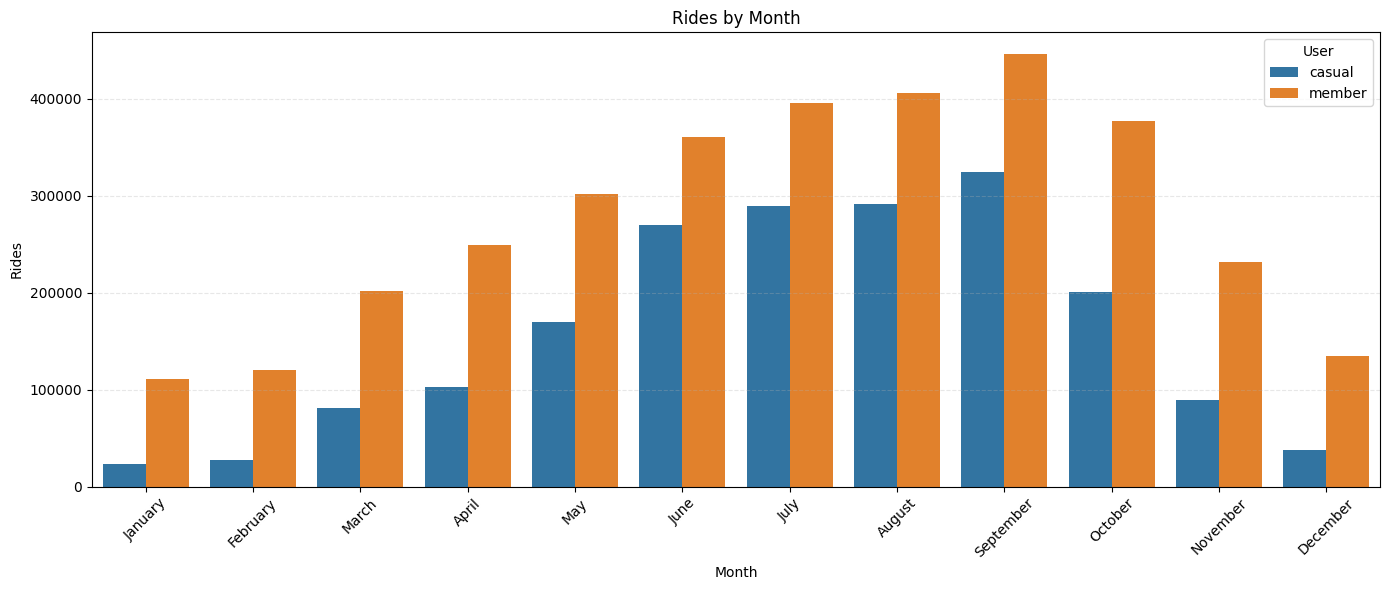

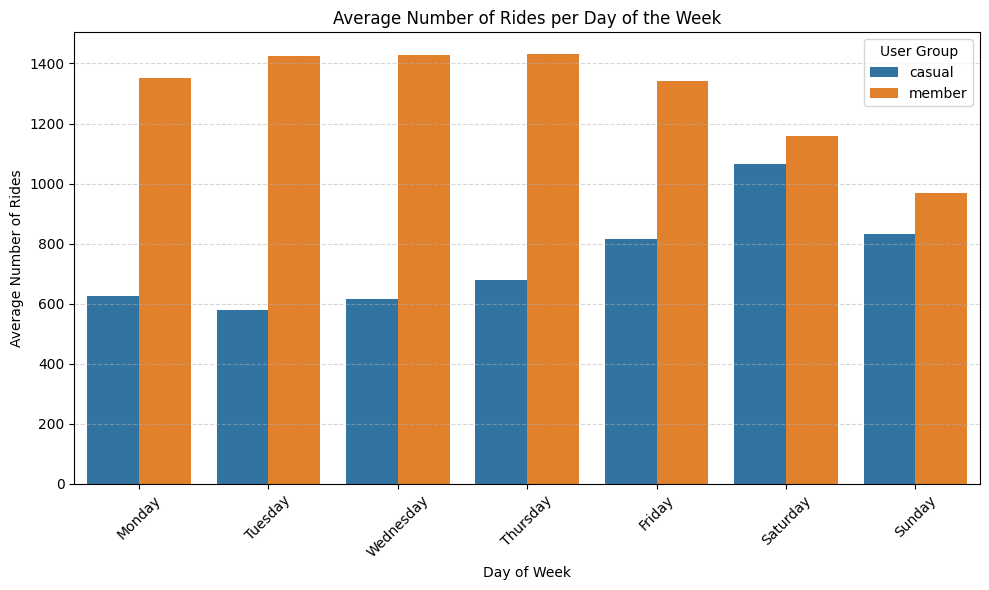

In [50]:
plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_counts, x='month', y='count', hue='member_casual')

plt.title('Rides by Month')
plt.xlabel('Month')
plt.ylabel('Rides')
plt.xticks(rotation=45)
plt.legend(title='User')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_by_weekday, x='day_of_week', y='daily_count', hue='member_casual')

plt.title('Average Number of Rides per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Rides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='User Group')
plt.tight_layout()
plt.show()




**Key findings**:
- Monthly trends in ride frequency show that both member and casual users exhibit similar patterns: a gradual increase from March, reaching a peak in September, followed by a steady decline. Between December and February, usage remains consistently low with minimal variation compared to the rest of the year.

- Weekday usage trends differ by user type:
    - Members ride more on weekdays (Monday to Friday) and less on weekends 
    - Casual users ride less on weekdays (Monday to Thursday) but more on weekends, especially from Friday to Sunday.

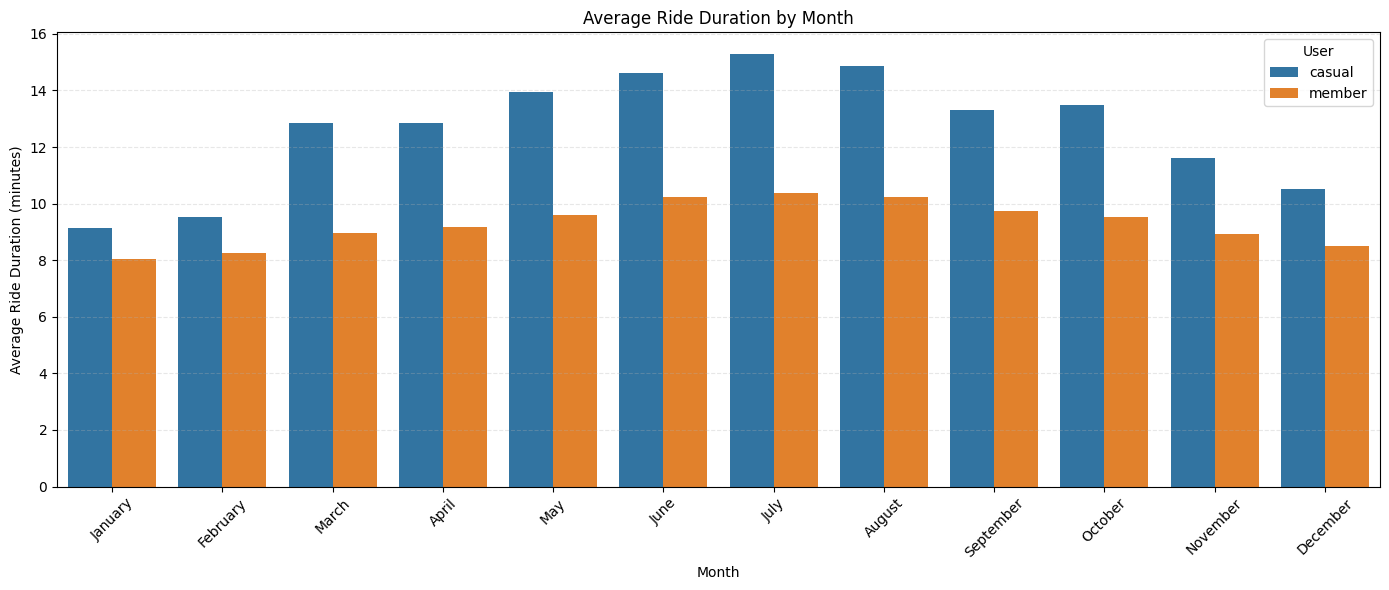

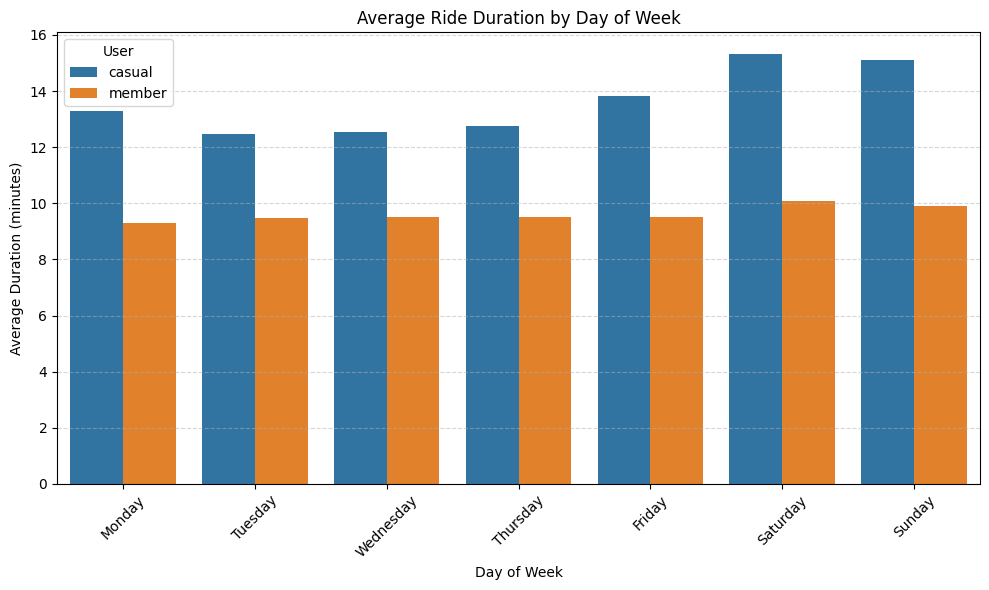

In [51]:
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_ride_length_by_month,
            x='month',
            y='ride_length_minutes',
            hue='member_casual')

plt.title('Average Ride Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='User')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration_by_day, x='day_of_week', y='ride_length_minutes', hue='member_casual')

plt.title('Average Ride Duration by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='User')
plt.tight_layout()
plt.show()


**Key findings**: In terms of average ride duration, casual users consistently take longer rides than members. Specifically:
- By month: casual users average between 9 and 15 minutes, while members average between 8 and 10 minutes.
- By day of the week: casual users average 12 to 15 minutes, compared to 9 to 10 minutes for members.

#### 2. Hourly Patterns

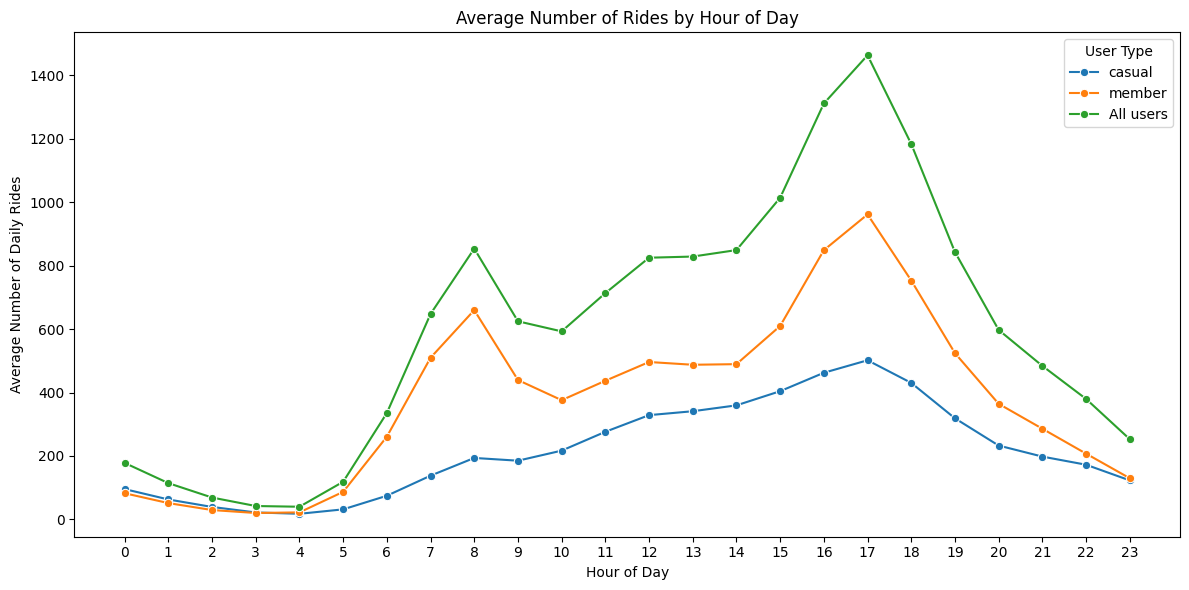

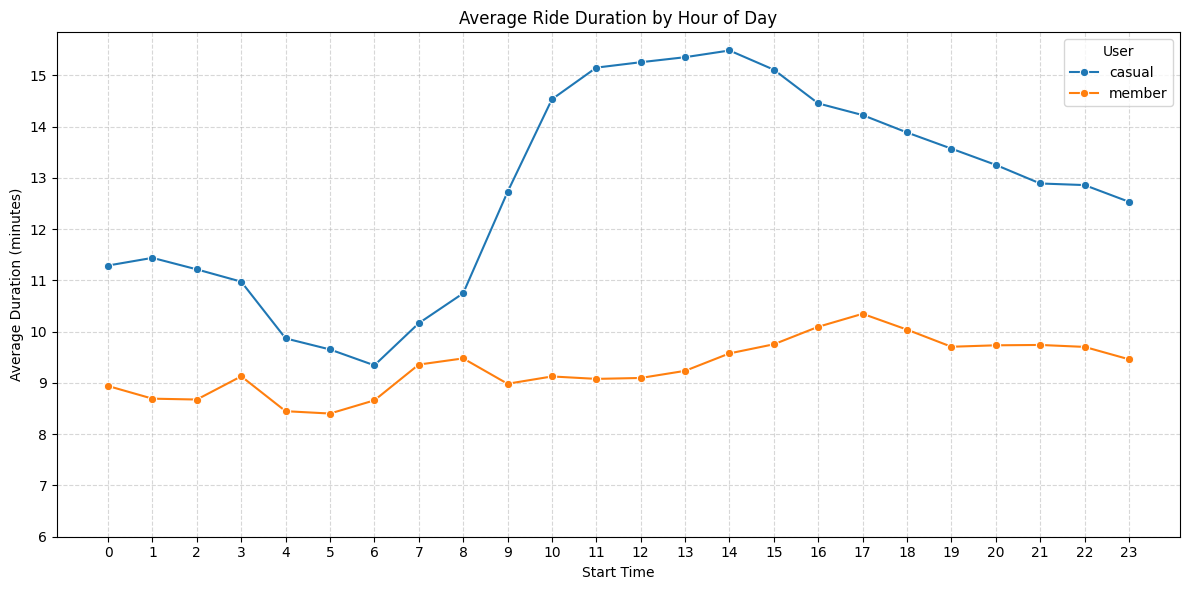

In [52]:
# Calculate the total average for both groups by hour
all_users = avg_hourly.groupby('hour')['daily_hourly_count'].sum().reset_index()
all_users['member_casual'] = 'All users'

# Concatenate with the current data
avg_hourly_all = pd.concat([avg_hourly, all_users], ignore_index=True)

# Plot the chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_hourly_all, x='hour', y='daily_hourly_count', hue='member_casual', marker='o')

plt.title('Average Number of Rides by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Daily Rides')
plt.xticks(range(0, 24))
plt.legend(title='User Type') 
plt.tight_layout()
plt.show()


# Plot the chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_by_hour_group, x='hour', y='ride_length_minutes', hue='member_casual', marker='o')

# Customize the chart
plt.title('Average Ride Duration by Hour of Day')
plt.xlabel('Start Time')
plt.ylabel('Average Duration (minutes)')
plt.xticks(range(0, 24))
plt.yticks(range(6, 16))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='User')
plt.tight_layout()
plt.show()


**Key findings:**
* The ride frequency of casual users is relatively stable throughout the day, peaking only once at 17:00.
* In contrast, member usage fluctuates more sharply, with rapid changes around peak commuting hours. Their ride volume peaks at both 8:00 and 17:00.
* Additionally, between 0:00 and 3:00, casual users slightly outnumber members in ride count, though the difference is minimal.

* About Average Ride Duration by hour of the day: 
    - Members show relatively low variation, with durations ranging from just over 8 minutes to a peak of 10.34 minutes at 5 PM.
    - Casual users, on the other hand, consistently record longer trip durations than members at every hour of the day. Their durations vary significantly, from a low of 9.34 minutes to a high of 15.48 minutes.

#### 3. Analysis of Start and End Stations

In [53]:
route_pivot.head(10)[["total","casual","member"]]

member_casual,total,casual,member
route,,,
"(Ellis Ave & 55th St, Ellis Ave & 60th St)",10024,2345,7679
"(Calumet Ave & 33rd St, State St & 33rd St)",9394,890,8504
"(Ellis Ave & 60th St, University Ave & 57th St)",9174,1850,7324
"(DuSable Lake Shore Dr & Monroe St, Streeter Dr & Grand Ave)",7284,6669,615
"(Streeter Dr & Grand Ave, Streeter Dr & Grand Ave)",6223,5782,441
"(DuSable Lake Shore Dr & Monroe St, DuSable Lake Shore Dr & Monroe St)",5292,4955,337
"(Loomis St & Lexington St, Morgan St & Polk St)",4702,515,4187
"(Kimbark Ave & 53rd St, University Ave & 57th St)",4458,1194,3264
"(DuSable Lake Shore Dr & Monroe St, Shedd Aquarium)",4170,3790,380


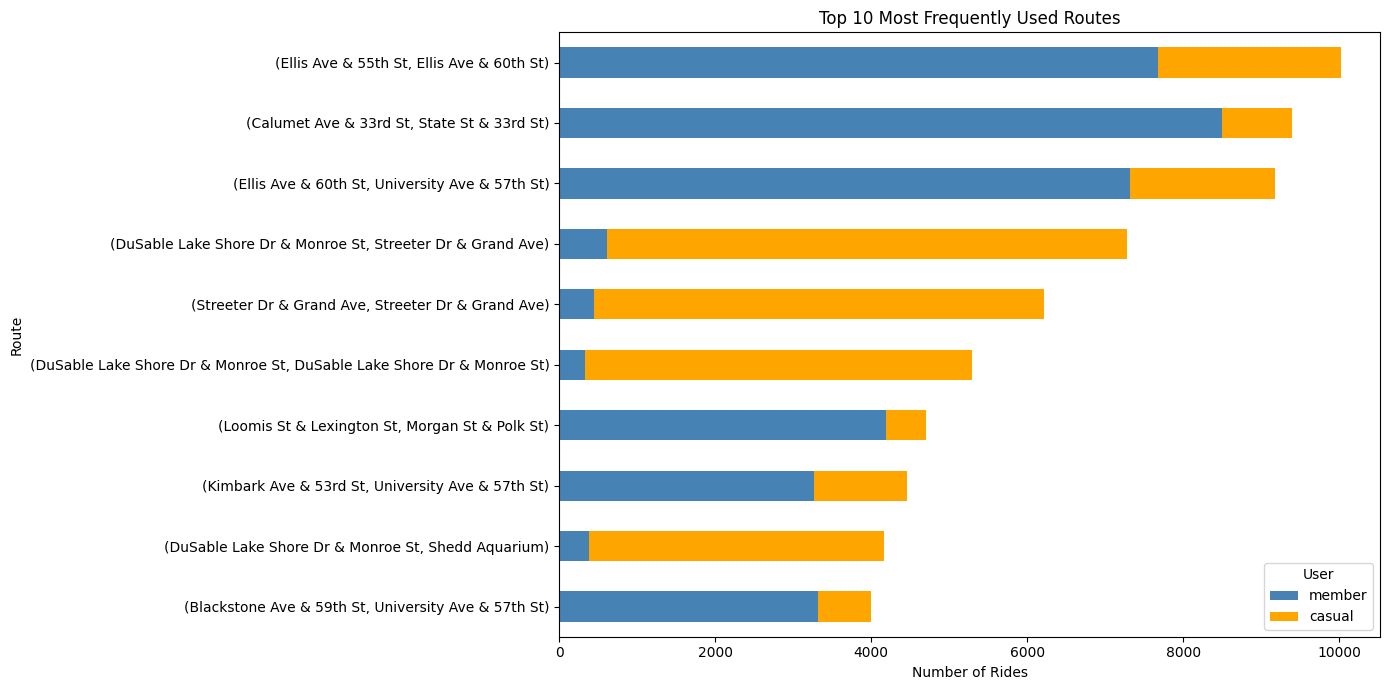

In [54]:

#  Horizontal stacked bar chart

route_pivot.head(10)[["member","casual"]].plot(
    kind='barh',
    stacked=True,
    figsize=(14, 7),
    color=['steelblue', 'orange']
)

plt.xlabel('Number of Rides')
plt.ylabel('Route')
plt.title('Top 10 Most Frequently Used Routes')
plt.legend(title='User')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


**Key findings:** Not all top routes are member-dominated; some favor casual users, and their presence remains strong even where members lead.

#### 4. Rideable Type Usage

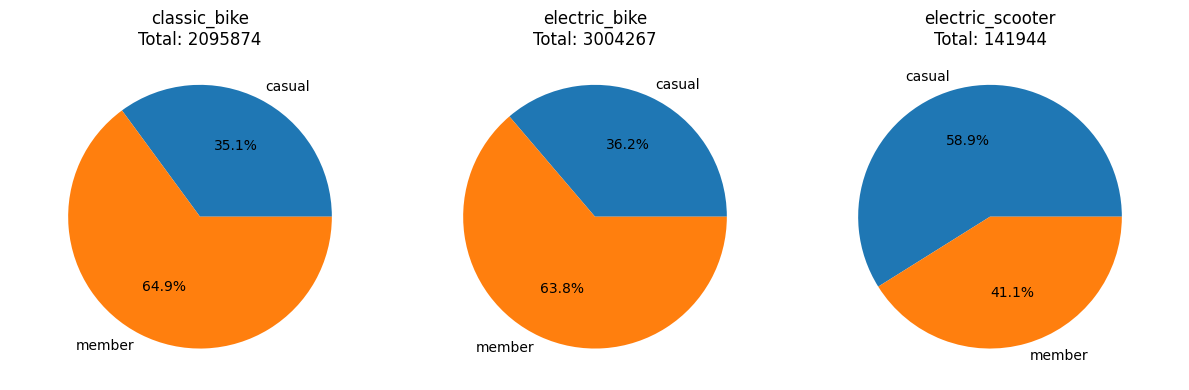

In [55]:
import matplotlib.pyplot as plt

bike_types = bike_pref['rideable_type'].unique()
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, bike_type in zip(axs, bike_types):
    data = bike_pref[bike_pref['rideable_type'] == bike_type]
    total = data['count'].sum()
    ax.pie(data['count'], labels=data['member_casual'], autopct='%1.1f%%')
    ax.set_title(f'{bike_type}\nTotal: {total}')
    ax.axis('equal')

plt.tight_layout()
plt.show()


Electric scooter usage is slightly higher among casual users.

***
# Act

### Summary

Overall, members and casual users differ fundamentally in the following ways:

**1. Ride Frequency:**
Members are characterized by a significantly higher number of rides compared to casual users. This large gap is consistently observed across both monthly and weekday comparisons. This explains why financial analysis shows that members contribute more to revenue.

**2. Average Trip Duration:**
Casual users consistently take longer trips on average than members, regardless of whether the comparison is by month or by weekday. Although their rides are shorter, the average duration for members remains relatively stable over time. This can be attributed to usage patterns: members tend to use bikes for daily commuting or work-related purposes, while casual users are often tourists or recreational riders, using bikes for leisure, sightseeing, or exploring the city.

**3. Hourly Patterns (0–23 scale):**

* The ride frequency of casual users is relatively stable throughout the day, peaking only once at 17:00.
* In contrast, member usage fluctuates more sharply, with rapid changes around peak commuting hours. Their ride volume peaks at both 8:00 and 17:00.
* Additionally, between 0:00 and 3:00, casual users slightly outnumber members in ride count, though the difference is minimal.

**4. User Distribution Across Top Routes:**

In the top busiest routes, member users are not always the dominant group. Certain routes see casual users taking significantly more rides. Even on routes where members outnumber casuals, the number of casual riders remains noteworthy.

**5. Rideable Type Usage:**

Both members and casual users share the same preference order for the three types of vehicles, from most to least used: electric_bike > classic_bike > electric_scooter.
While members have higher usage frequency for electric bikes and classic bikes, casual users slightly outnumber members in the use of electric scooters.

### Recommendations

**Question 2: Why would casual riders buy Cyclistic annual memberships**

Recommendation 1: Focus on casual riders with short weekday trips during peak hours
These users show commuting patterns similar to members, with rides around 8 AM and 5 PM under 11 minutes. Offer memberships as a more affordable and efficient choice for their routine travel.

**Question 3: How can Cyclistic use digital media to influence casual riders to become members**

Recommendation 2: Use digital ads targeted by time and behavior
Deliver personalized ads through in-app channels and social media during peak usage times. Tailor messages to highlight membership benefits for daily commuters.


**Additional Support for Overall Marketing Strategy**

Recommendation 3: Personalize promotions based on top routes and bike type preferences
Identify casual riders who often use routes popular with members or prefer electric bikes. Craft messages that reflect their habits and show how membership enhances their typical experience.